In [2]:
using Turing, MCMCChains, Distributions
using StatsPlots

In [3]:
# construct the probabilistic model
@model function rdeg2(y)
   N = length(y)
   # define prior
   α ~ Gamma(1.0, 0.2)
   α0 ~ Gamma(1.0, 0.2)
   β0 ~ Gamma(1.0, 0.2)

   # Likelihood
   β ~ filldist(Gamma(α0, β0), N)
   for i in 1:N
     y[i] ~ Gamma(α,β[i])
   end
   return y
end

rdeg2 (generic function with 2 methods)

In [13]:
# collect data
data = Float64[]
for i in 1:10 # Original example was 120 samples
   β = rand(Gamma(0.6, 0.04))
   push!(data, rand(Gamma(0.4, β)))
end

In [14]:
model = rdeg2(data)
chain = sample(model, NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 0.8
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×25×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.35 seconds
Compute duration  = 0.35 seconds
parameters        = α, α0, β0, β[1], β[2], β[3], β[4], β[5], β[6], β[7], β[8], β[9], β[10]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           α    0.5016    0.2230    0.0140   258.8100   469.6902    1.0030     ⋯
          α0    0.5270    0.2215    0.0109   462.1040   512.8357    1.0012     ⋯
          β0    0.1120    0.1273    0.0071   246.7322   391.0370    1.0013     ⋯
        β[1]    0.0200    0.0678    0.0028   407.0011   673.4573    0.9990     ⋯
    

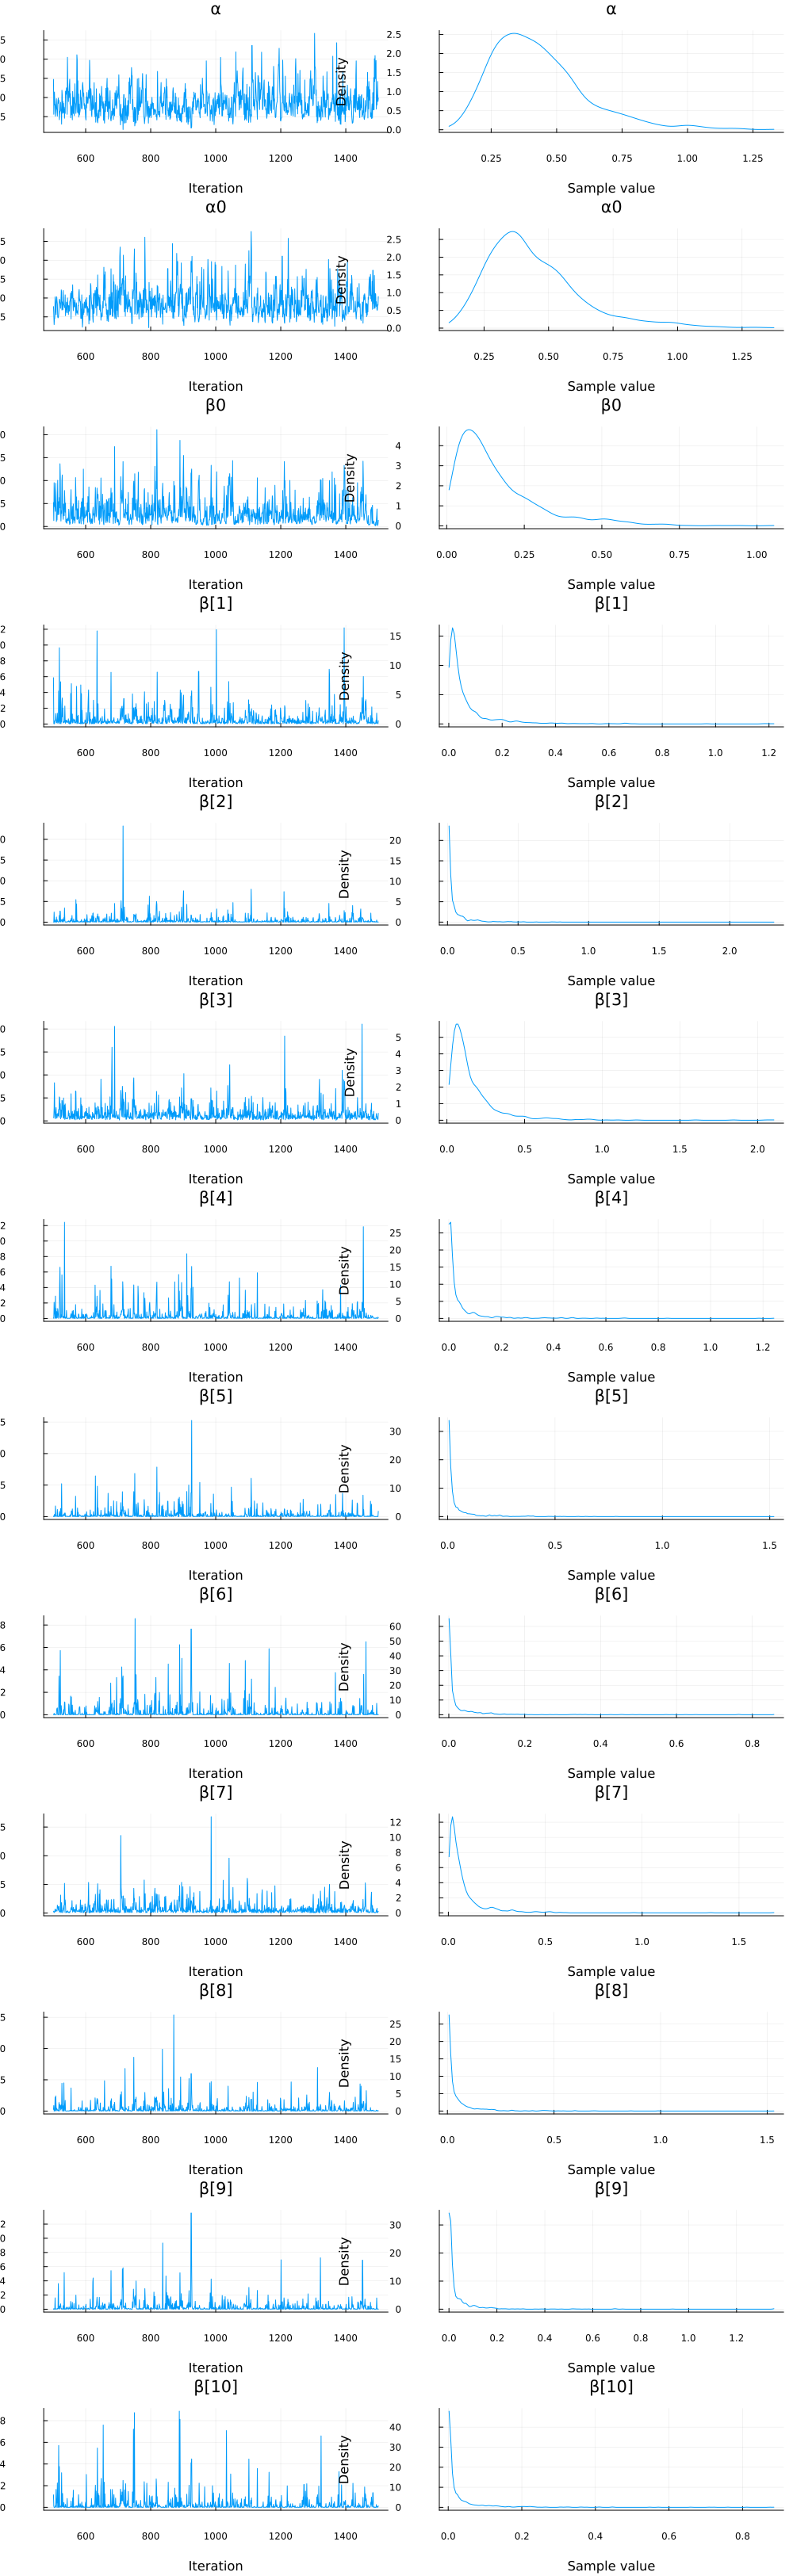

In [12]:
plot(chain)

# References

- [ ] [Parameter estimation problem in Turing](https://discourse.julialang.org/t/parameter-estimation-problem-in-turing/84147)